## Domaine fréquentiel
Pyramides Gaussienne, Laplacien et filtre fréquentiel

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage.filters import gaussian
from skimage.transform import resize
from scipy import signal
from scipy.signal.windows import gaussian as sgaussian
from scipy.fft import fft2, ifft2, fftshift

## Exercice 1
Créer une fonction qui construit une pyramide gaussianne de **n** niveaux pour **img**.
> Pour les échantillonages, vous pouvez utiliser `skimage.transform.resize` ou faire des bonds sur les index comme vu précédamment (ex: `::2`)

In [2]:
def pyramide_gaussienne(img, n=5):
    pyramide = [img]
    for i in range(n):
        prev = pyramide[i]
        prev = prev[::2, ::2]
        prev = gaussian(prev, sigma=2)
        pyramide.append(prev)
    
    return pyramide

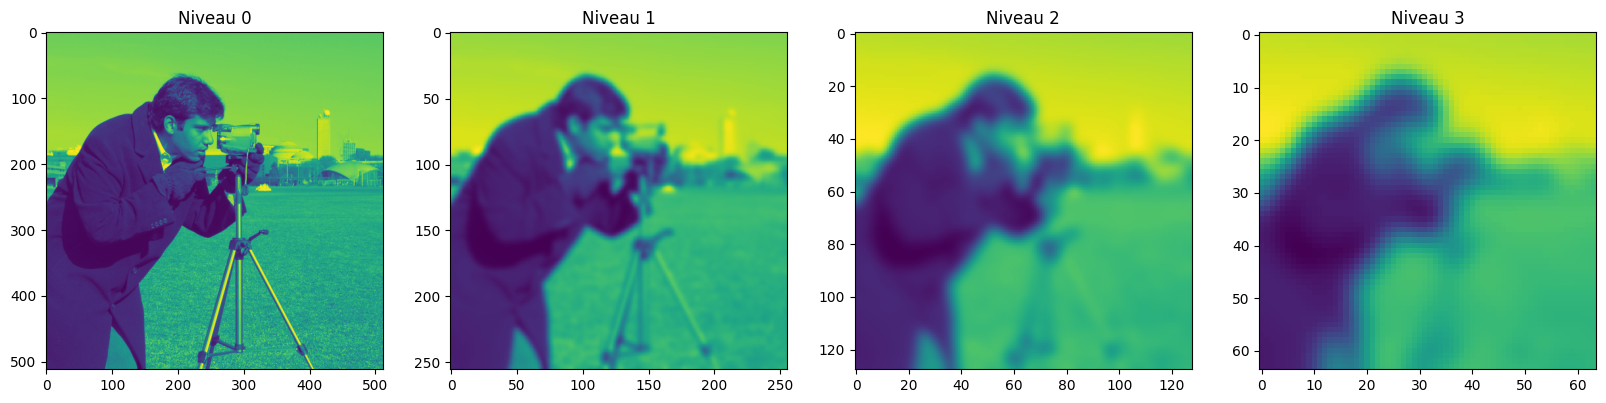

In [3]:
# Testez votre fonction ici
img = data.camera()
n = 4
p_gaussienne = pyramide_gaussienne(img, n)

plt.figure(figsize=(20,20))
plot = 100 + n * 10

for i in range(n):
    plot += 1
    plt.subplot(plot)
    plt.imshow(p_gaussienne[i])
    plt.title('Niveau ' + str(i))
    
plt.show()

## Exercice 2
Créer une fonction qui construit une pyramide laplacienne de **n** niveaux pour **img**.
> Je vous recommende d'utiliser votre implémentation de la pyramide gaussienne pour sauver du temps.

In [13]:
def pyramide_laplacienne(img, n=5):
    pyramide = []
    img_courrante = img
    for i in range(n):
        # sous echantillonage 
        sous_echant = gaussian(img_courrante, sigma=2)
        sous_echant = img_courrante[::2, ::2]
       
        # Sur echantillonage
        shape_img_courrante = img_courrante.shape
        sur_echant = np.zeros(shape_img_courrante)
        sur_echant[::2,::2] = sous_echant
        
        # Difference
        niveau = np.abs(sur_echant - img_courrante)

        img_courrante = sous_echant
        pyramide.append(niveau)
        
    return pyramide

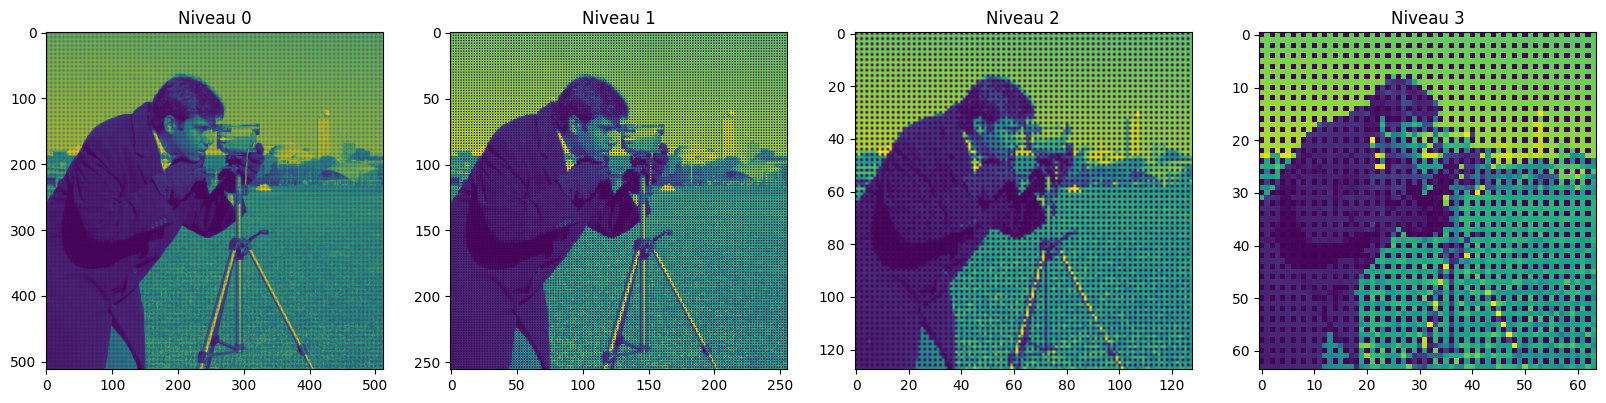

In [15]:
# Testez votre fonction ici
n = 4
p_laplacienne = pyramide_laplacienne(img, n)

plt.figure(figsize=(20,20))
plot = 100 + n * 10

for i in range(n):
    plot += 1
    plt.subplot(plot)
    plt.imshow(p_laplacienne[i])
    plt.title('Niveau ' + str(i))

image = []


## Exercice 3
Appliquer ce filtre gaussien **filter_2D** sur **img** aux numéros précédants dans le domaine fréquentiel.
> **Rappel:** une convolution dans le domaine fréquentiel est équivalent à une multiplication dans le domaine fréquentiel.

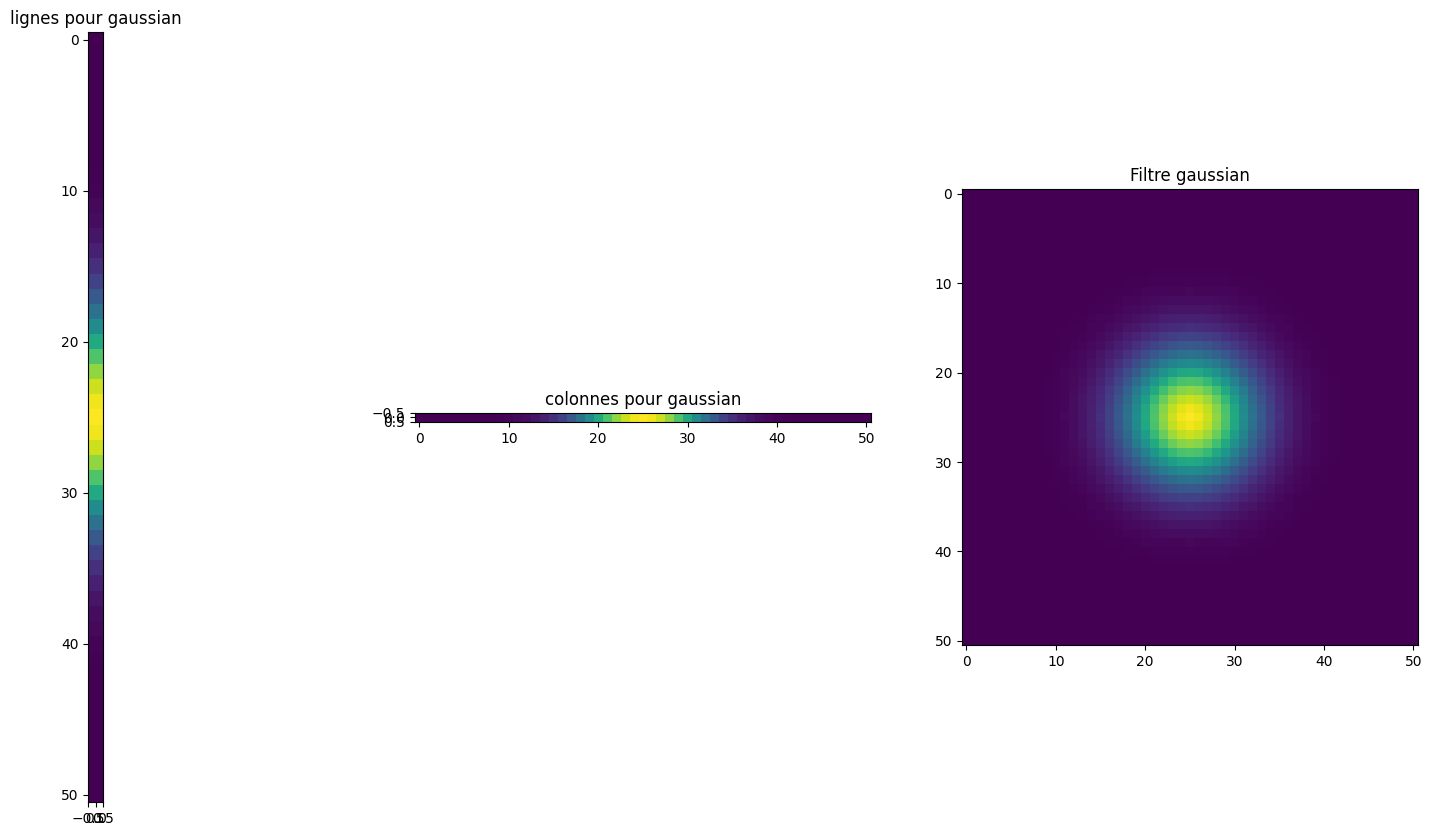

In [11]:
# Création du filtre
plt.figure(figsize=(20,10))

hs = 25
filter_1D = sgaussian(2 * hs + 1, 5)

plt.subplot(131)
filter_line = filter_1D.reshape((2 * hs + 1, 1))
plt.imshow(filter_line); plt.title('lignes pour gaussian')

plt.subplot(132)
filter_column = filter_1D.reshape((1, 2 * hs + 1))
plt.imshow(filter_column); plt.title('colonnes pour gaussian')

plt.subplot(133)
filter_2D = filter_line * filter_column
plt.imshow(filter_2D); plt.title('Filtre gaussian')

plt.show()

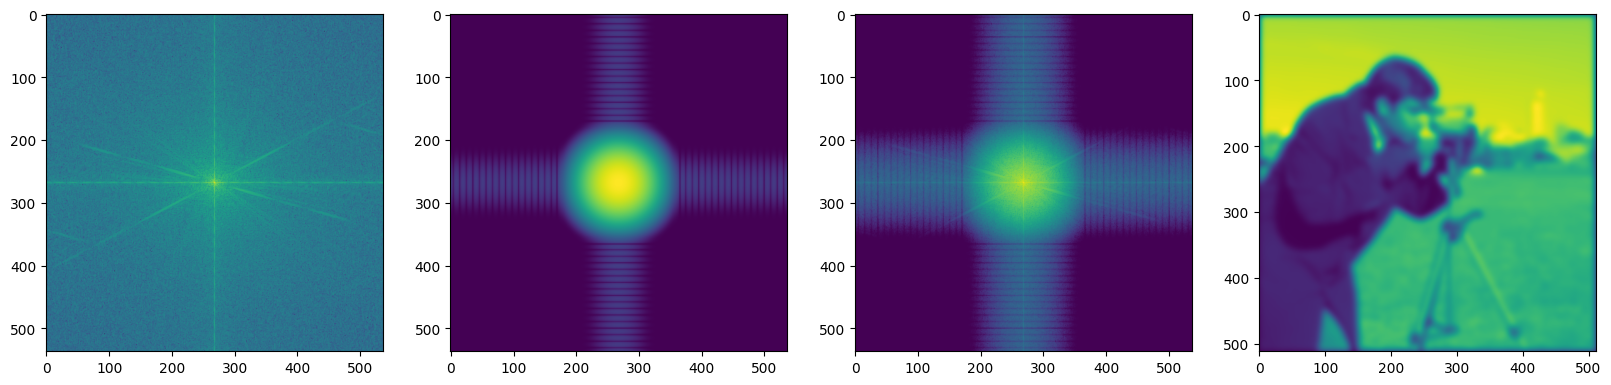

In [31]:
plt.figure(figsize=(20,20))

fftsize = np.array(img.shape) + hs

# fft img
plt.subplot(141)
img_fft = fft2(img, fftsize)
img_fft_show = fftshift(img_fft)
plt.imshow(np.log(np.abs(img_fft_show) + 1e-6))

# fft filter
plt.subplot(142)
filter_fft = fft2(filter_2D, fftsize)
img_fft_show = fftshift(filter_fft)
plt.imshow(np.log(np.abs(img_fft_show) + 1e-6))

# fft multiplication
plt.subplot(143)
filtered_fft = img_fft * filter_fft
img_fft_show = fftshift(filtered_fft)
plt.imshow(np.log(np.abs(img_fft_show) + 1e-6))

# ifft result
plt.subplot(144)
result = ifft2(filtered_fft)
plt.imshow(result.real[hs:, hs:])

plt.show()